In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [88]:
size = (4, 4)
img = []
for i in range(size[0]):
    _t = []
    for j in range(size[1]):
        _n = [np.random.randint(256), np.random.randint(256), np.random.randint(256)]
        _t.append(_n)
    img.append(np.array(_t))
img = np.array(img, dtype=np.uint8)

<IPython.core.display.Javascript object>


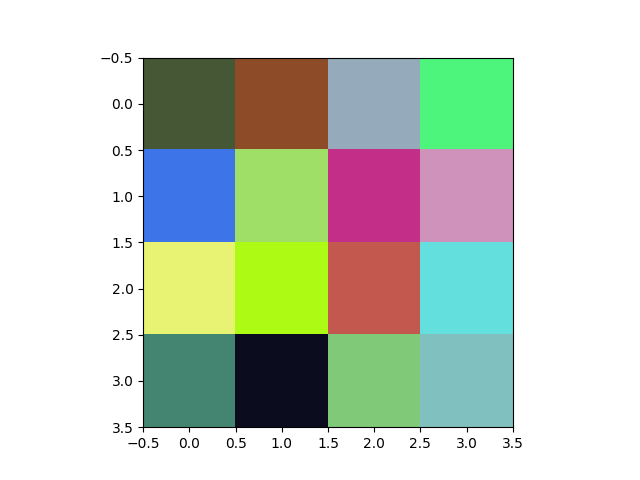

In [98]:
plt.figure()
plt.imshow(img)

In [60]:
print(img)

[[[174 119 246]
  [219 184 187]
  [ 26 208  57]
  [ 54 115 195]]

 [[203 222 169]
  [ 35  43 189]
  [ 97 116 205]
  [ 23  23  99]]

 [[ 84  30 153]
  [110 149  39]
  [251  16 176]
  [180 202 123]]

 [[201 215 234]
  [181 239  41]
  [127  36  57]
  [ 59  21 105]]]


In [90]:
SR_Factor = 2
outsize=(size[1]*SR_Factor,size[0]*SR_Factor)
result=cv2.resize(img,outsize,interpolation=cv2.INTER_NEAREST)
result

array([[[ 69,  87,  52],
        [ 69,  87,  52],
        [141,  76,  39],
        [141,  76,  39],
        [149, 171, 187],
        [149, 171, 187],
        [ 77, 245, 124],
        [ 77, 245, 124]],

       [[ 69,  87,  52],
        [ 69,  87,  52],
        [141,  76,  39],
        [141,  76,  39],
        [149, 171, 187],
        [149, 171, 187],
        [ 77, 245, 124],
        [ 77, 245, 124]],

       [[ 61, 116, 232],
        [ 61, 116, 232],
        [160, 223, 103],
        [160, 223, 103],
        [195,  47, 136],
        [195,  47, 136],
        [206, 146, 187],
        [206, 146, 187]],

       [[ 61, 116, 232],
        [ 61, 116, 232],
        [160, 223, 103],
        [160, 223, 103],
        [195,  47, 136],
        [195,  47, 136],
        [206, 146, 187],
        [206, 146, 187]],

       [[232, 243, 116],
        [232, 243, 116],
        [173, 250,  20],
        [173, 250,  20],
        [195,  89,  78],
        [195,  89,  78],
        [ 99, 223, 222],
        [ 99, 223

<IPython.core.display.Javascript object>


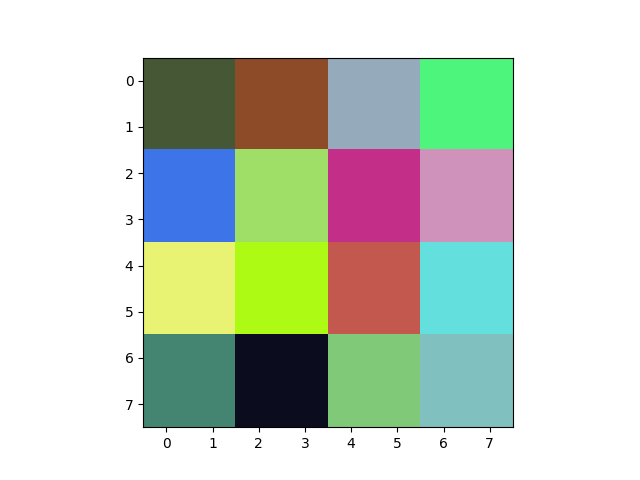

In [91]:
plt.figure()
plt.imshow(result)

# Linear interpolation

- Factor 2
- 22 218 101 61
- 22 (22 + 218)/2 = 110 218
- 22 110 /2 = 71
- 110 218/2 = 169
- 22 71 169  . . 

In [92]:
SR_Factor = 2
outsize=(size[1]*SR_Factor,size[0]*SR_Factor)
result=cv2.resize(img,outsize)

<IPython.core.display.Javascript object>


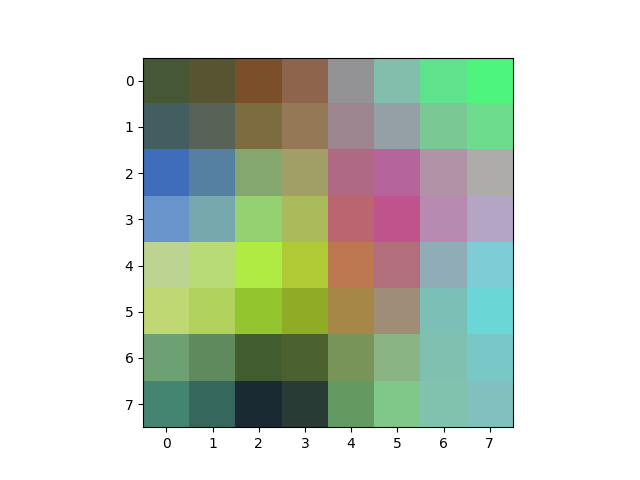

In [93]:
plt.figure()
plt.imshow(result)

## Bicubic interpolation

<IPython.core.display.Javascript object>


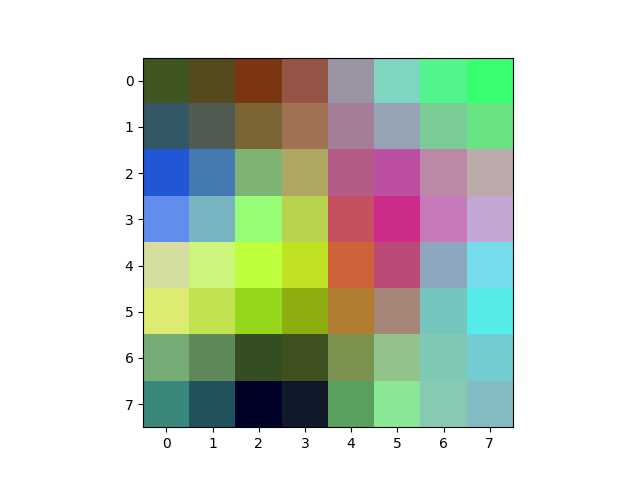

In [94]:
result=cv2.resize(img,outsize,interpolation=cv2.INTER_CUBIC)
plt.figure()
plt.imshow(result)

## Spline Interpolation

<IPython.core.display.Javascript object>


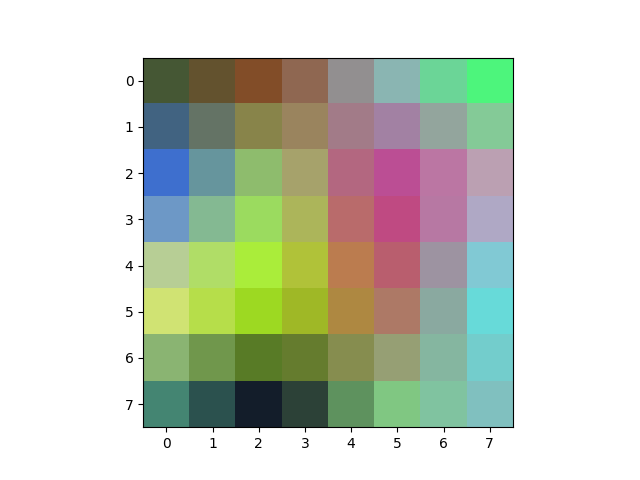

In [99]:
from scipy.interpolate import SmoothBivariateSpline, UnivariateSpline
lr_image = img

#print(lr_image.shape)

SR_FACTOR = 2

_K = 1
dim = (lr_image.shape[0]*SR_FACTOR, lr_image.shape[1]*SR_FACTOR, 3)
sr_image = np.zeros(dim, dtype=np.uint8)

for (i,row) in enumerate(lr_image):
    len_row=len(row);
    for j in range(3):
        x = np.linspace(0,len_row-1,len_row)
        y=row[:,j]
        spl = UnivariateSpline(x, y, k=_K)
        spl.set_smoothing_factor(0)
        x=np.linspace(0,len_row-1,len_row*SR_FACTOR)
        y=spl(x)
        sr_image[i,:,j]=y

tem_image=sr_image[0:int(dim[0]/SR_FACTOR),:,:]
len_row=tem_image.shape[1]
for i in range(len_row):
    column=tem_image[:,i,:];
    for j in range(3):
        x = np.linspace(0,tem_image.shape[0]-1,tem_image.shape[0])
        y=column[:,j]
        spl = UnivariateSpline(x, y, k=_K)
        spl.set_smoothing_factor(0)
        x=np.linspace(0,tem_image.shape[0]-1,tem_image.shape[0]*SR_FACTOR)
        y=spl(x)
        sr_image[:,i,j]=y

plt.figure()
plt.imshow(sr_image)

# Dataset

In [89]:
pathIn = '../data/'
pathOut = 'result/'
file_name = '3'
ext = '.jpg'

lr_image = cv2.imread(pathIn + file_name + ext)
lr_image.shape

(355, 474, 3)

## Linear Interpolation

In [90]:
SR_FACTOR = 2
size=lr_image.shape
outsize=(size[1]*SR_FACTOR,size[0]*SR_FACTOR)
sr_image=cv2.resize(lr_image,outsize)

save_name = file_name + '_linear_' + str(SR_FACTOR)
cv2.imwrite(pathOut + save_name + ext , sr_image)

True

## Bicubic interpolation

In [91]:
SR_FACTOR = 2
size=lr_image.shape
outsize=(size[1]*SR_FACTOR,size[0]*SR_FACTOR)
sr_image=cv2.resize(lr_image,outsize, interpolation=cv2.INTER_CUBIC)

save_name = file_name + '_bicubic_' + str(SR_FACTOR)
cv2.imwrite(pathOut + save_name + ext , sr_image)

True

## Nearest Neighbour (Duplication) Interpolation

In [92]:
SR_FACTOR = 2
size=lr_image.shape
outsize=(size[1]*SR_FACTOR,size[0]*SR_FACTOR)
sr_image=cv2.resize(lr_image,outsize, interpolation=cv2.INTER_NEAREST)

save_name = file_name + '_NN_' + str(SR_FACTOR)
cv2.imwrite(pathOut + save_name + ext , sr_image)

True

# B Spline interpolation